# Logistic Map and Henon Map - Bifurcation Behavior and Fractals

The logistic function is 

$$
\begin{gather*}
    f_{\alpha}(x) = 4\alpha x(1-x)
\end{gather*}
$$

and 

$$
\begin{gather*}
    x_{n+1} = 4\alpha x_n(1 - x_n)
\end{gather*}
$$

## Logistic Map - Bifurcation Diagram

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

In [9]:
def logistic_map(alpha, x):
    return 4 * alpha * x * (1 - x)

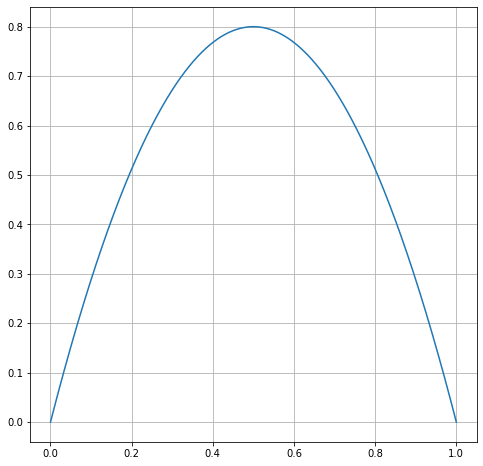

In [10]:
# The graphical representation of the logisitic map is 
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(x, logistic_map(0.8, x))
plt.grid(True)
plt.show()

### Create the bifurcation diagram

Plot the bifurcation diagram with the Lyapunov Exponent which is 

$$ 
\begin{gather*}
    \lambda(\alpha) = \lim_{n\rightarrow \infty}\dfrac{1}{n}\sum_{i=0}^{n-1} \ln\left| \dfrac{df_{\alpha}}{dx} \left( x_i^{(\alpha)} \right) \right|
\end{gather*}
$$

In [30]:
def logistic_map_bifurcation(N, maxIter, last, alpha_lim, init_guess):
    # Initialize matrices
    x = np.ones(N)

    # alpha values
    a0 = alpha_lim[0]
    af = alpha_lim[1]
    alpha = np.linspace(a0, af, N)

    # initial guess 
    init_guess = 0.5
    x *= init_guess

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
    LAMBDA = np.zeros(N)

    for i in range(maxIter):
        x = logistic_map(alpha, x)  # update x with the new results
        # Lyapunov exponent
        LAMBDA += np.log(abs(4 * alpha * (1 - 2 * x)))
        # Plot the last portion of the points 
        if i >= (maxIter - last):
            color = (random(), random(), random())
            ax1.plot(alpha, x, ',', c=color, alpha=0.2)

    ax1.set_xlim(a0, af)
    ax1.set_title("Bifurcation Diagram")
    ax1.grid(True)

    # Plot the Lyapunov exponent
    # negative
    ax2.plot(alpha[LAMBDA < 0], LAMBDA[LAMBDA < 0] / maxIter, '.k', alpha=0.4, ms=0.5)
    # positive
    ax2.plot(alpha[LAMBDA >= 0], LAMBDA[LAMBDA >= 0] / maxIter, '.r', alpha=0.4, ms=0.5)
    ax2.set_xlim(a0, af)
    ax2.set_ylim(-2, 1)
    ax2.grid(True)
    ax2.set_title("Lyapunov Exponent")
    plt.show()

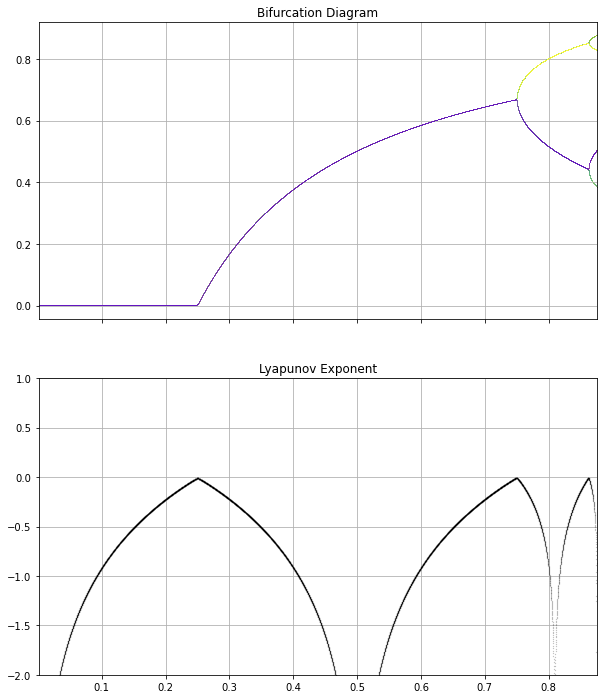

In [31]:
# First part of diagram - low resolution for alpha = 0 t0 alpha = 0.875
logistic_map_bifurcation(10000, 1000, 100, (0.001, 0.875), 0.5)

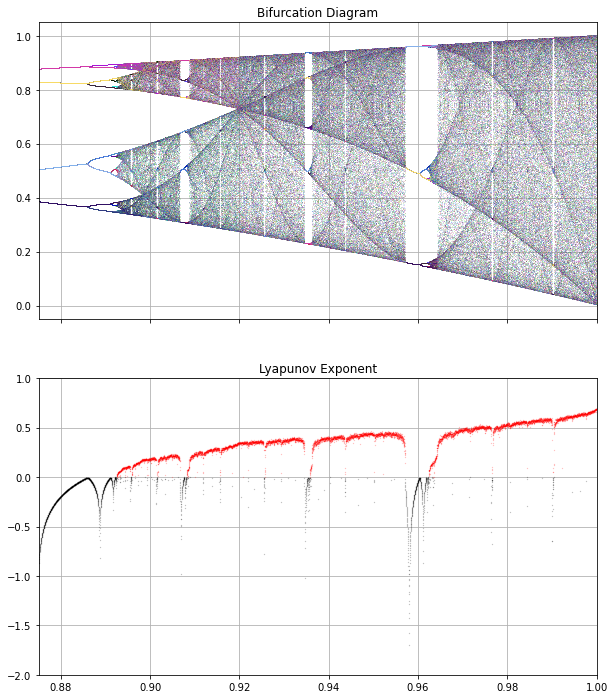

In [32]:
# Second part of the diagram - higher resolution for alpha = 0.875 to 1.0
logistic_map_bifurcation(10000, 1000, 50, (0.875, 1.0), 0.5)

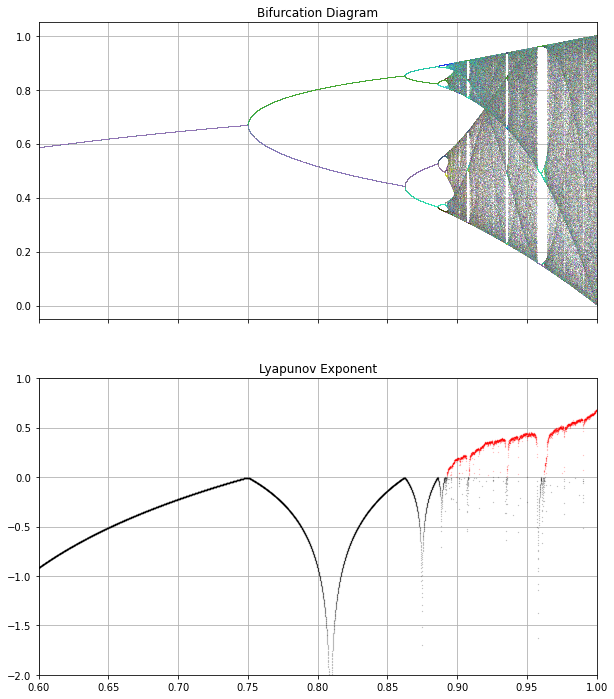

In [37]:
# alpha = 0.6 to 1.0
logistic_map_bifurcation(10000, 2000, 100, (0.6, 1.0), 0.5)

#### Courtesy

Cyrille Rossant - https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

## Henon Map

$$
\begin{align*}
    x_{n+1} &= 1 - \alpha x_n^2 + y_n\\
    y_{n+1} &= \beta x_n
\end{align*}
$$

In [3]:
def henon_map(alpha, beta, x, y):
    return [1 - alpha * x**2 + y, beta * x]

In [4]:
def plot_henon(N, maxIter, alpha, beta, x0, y0):
    x = np.ones(N)
    y = np.ones(N)
    x *= x0
    y *= y0

    fig, ax = plt.subplots(1, 1, figsize=(9, 8))

    for i in range(maxIter):
        x, y = henon_map(alpha, beta, x, y)
        color = (random(), random(), random())
        ax.plot(x, y, ',', c=color, alpha=0.5)

    ax.set_title('Henon Map Phase Plane')
    plt.show()

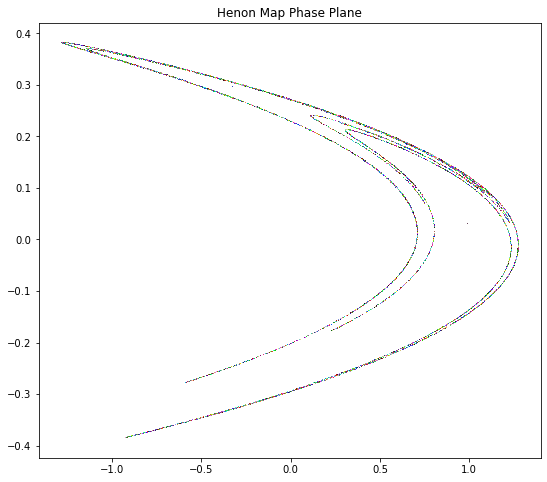

In [5]:
N = 10000

# starting from the initial condition (0.1, 0) iterate map for maxIter times
x0 = 0.1
y0 = 0
alpha = 1.4
beta = 0.3
maxIter = 10000

plot_henon(N, maxIter, alpha, beta, x0, y0)